In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("netflix_data.csv")
df.head()

,user_id,show_title,genre,watch_time,date_watched,rating
0,U001,Stranger Things,Thriller,90,01/05/2023,4.5
1,U002,The Office,Comedy,45,01/05/2023,4.7
2,U001,Narcos,Crime,120,02/05/2023,4.3
3,U003,Money Heist,Crime,110,02/05/2023,4.6
4,U004,Friends,Comedy,60,03/05/2023,4.8


In [4]:
df.info()             # Check nulls and datatypes
df.dropna(inplace=True)    # Remove missing values
df['date_watched'] = pd.to_datetime(df['date_watched'])   # Convert to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10 non-null     object 
 1   show_title    10 non-null     object 
 2   genre         10 non-null     object 
 3   watch_time    10 non-null     int64  
 4   date_watched  10 non-null     object 
 5   rating        10 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


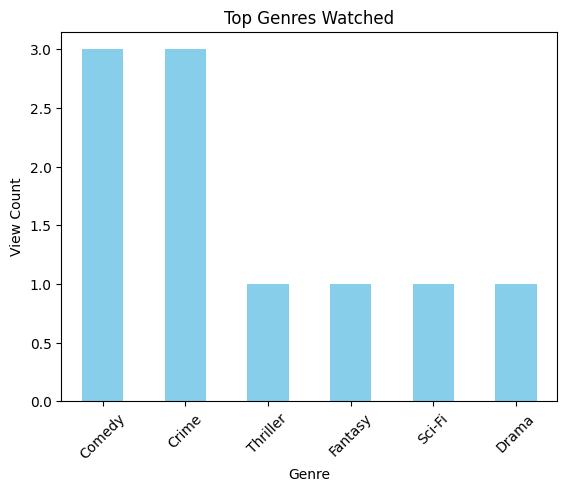

In [5]:
top_genres = df['genre'].value_counts().head(10)
top_genres.plot(kind='bar', title='Top Genres Watched', color='skyblue')
plt.xlabel("Genre")
plt.ylabel("View Count")
plt.xticks(rotation=45)
plt.show()

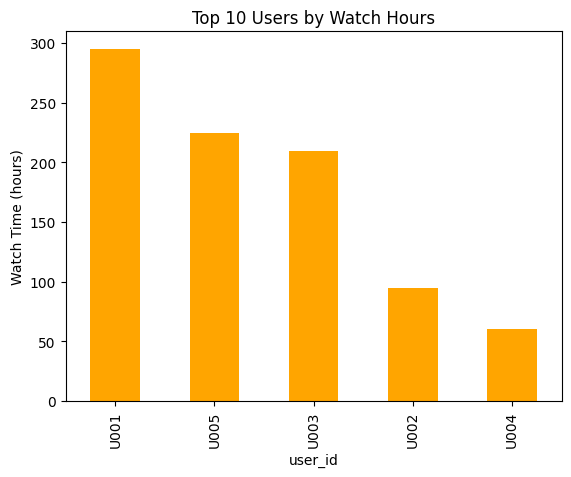

In [6]:
watch_hours = df.groupby('user_id')['watch_time'].sum().sort_values(ascending=False)
watch_hours.head(10).plot(kind='bar', title='Top 10 Users by Watch Hours', color='orange')
plt.ylabel("Watch Time (hours)")
plt.show()

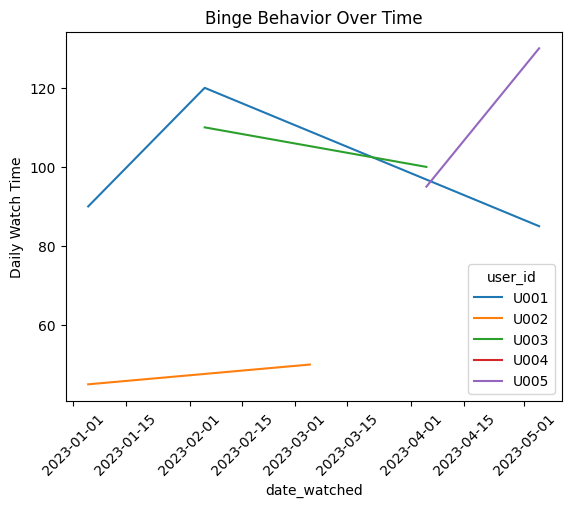

In [7]:
binge_data = df.groupby(['user_id', 'date_watched'])['watch_time'].sum().reset_index()
sns.lineplot(data=binge_data, x='date_watched', y='watch_time', hue='user_id')
plt.title("Binge Behavior Over Time")
plt.xticks(rotation=45)
plt.ylabel("Daily Watch Time")
plt.show()

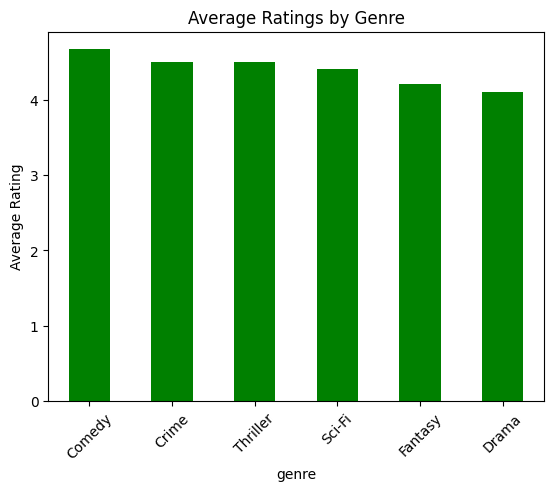

In [8]:
genre_rating = df.groupby('genre')['rating'].mean().sort_values(ascending=False)
genre_rating.plot(kind='bar', title='Average Ratings by Genre', color='green')
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()